In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import sympy as sp

plt.rcParams['font.size'] = 18
plt.rcParams['axes.grid'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.figsize'] = [8,6]

Text(0, 0.5, '$\\varphi$')

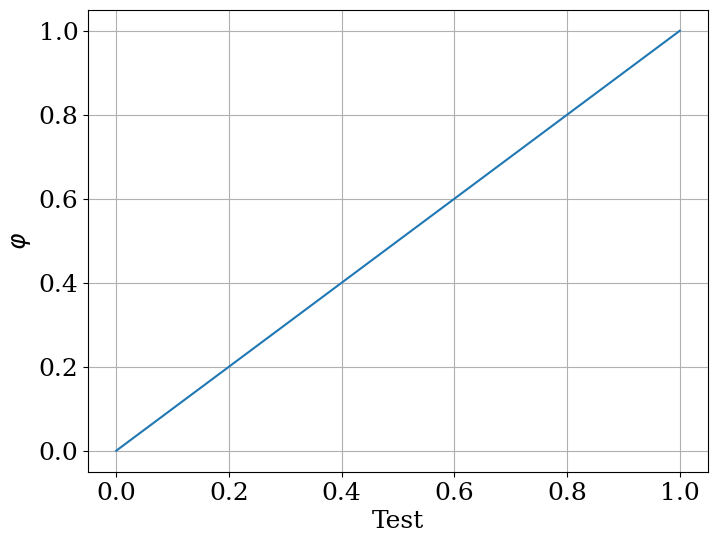

In [6]:
x = np.linspace(0, 1, 100)

plt.plot(x, x)
plt.xlabel("Test")
plt.ylabel(r"$\varphi$")